## Preprocess
The aim of this notebook is to analyse the movie metadata and plots and to preprocess the data for our anlyse with embeding.
You can found analyse previous to the preprocess and after in this notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts/')

from preprocess_function import preprocess_movie_metadata, preprocess_full



## Analyse of the movie metadata

In [2]:
# specify the column names 
column_names = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
movie_metadata_df = pd.read_table('../data/movie.metadata.tsv', names=column_names)
movie_metadata_df.head(2)

,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


In [3]:
#nan_value in the columns 
print("Number of value {}:".format(movie_metadata_df.shape[0]))
nan_value_tot_by_column = movie_metadata_df.isna().sum()
display(nan_value_tot_by_column.apply(lambda x: "NaN value: {:.1%}".format(x/len(movie_metadata_df))))
#

Number of value 81741:


wikipedia_id           NaN value: 0.0%
freebase_id            NaN value: 0.0%
name                   NaN value: 0.0%
release_date           NaN value: 8.4%
box_office_revenue    NaN value: 89.7%
runtime               NaN value: 25.0%
languages              NaN value: 0.0%
countries              NaN value: 0.0%
genres                 NaN value: 0.0%
dtype: object

**Warnings:** Be aware for the columns language, countries and genres, the nan value is not a real nan value but a string "{}".

In [4]:

# convert release date to year only while droping the 8.4 % of nan value
movie_metadata_df_dropnan = movie_metadata_df.dropna(subset=['release_date']).copy()
movie_metadata_df_dropnan['release_year'] = pd.to_datetime(movie_metadata_df_dropnan['release_date'], errors='coerce')

# extract year from datetime format
movie_metadata_df_dropnan['release_year'] = movie_metadata_df_dropnan['release_year'].dt.year.astype('Int16').astype('str')
movie_metadata_df_dropnan = movie_metadata_df_dropnan.drop(columns=['release_date'])

display(movie_metadata_df_dropnan.shape)
display(movie_metadata_df_dropnan.head(2))

(74839, 9)

,wikipedia_id,freebase_id,name,box_office_revenue,runtime,languages,countries,genres,release_year
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000


**We will look at the missing data in the columns genres, language and country**

In [5]:
movie_metadata_df_dropna = movie_metadata_df
non_empty_lanhuage = movie_metadata_df_dropna['languages'].apply(lambda x: False if x == '{}' else True).copy()
print("Poucentage of value in the language column {:%}".format(non_empty_lanhuage.sum()/len(movie_metadata_df_dropnan['languages'])))

Poucentage of value in the language column 90.694691%


In [6]:
non_empty_countries = movie_metadata_df_dropnan['countries'].apply(lambda x: False if x == '{}' else True).copy()
print("Poucentage of value in the countries column {:%}".format(non_empty_countries.sum()/len(movie_metadata_df_dropnan['countries'])))

Poucentage of value in the countries column 93.014337%


In [7]:
non_empty_genres = movie_metadata_df_dropnan['genres'].apply(lambda x: False if x == '{}' else True).copy()
print("Poucentage of value in the genres column {:%}".format(non_empty_genres.sum()/len(movie_metadata_df_dropnan['genres'])))

Poucentage of value in the genres column 97.645613%


**Now we will look at the duplicates when creating an index name_year**

In [8]:
clean_df_add_index = movie_metadata_df_dropnan.copy()
print(clean_df_add_index.shape)
clean_df_add_index['index_special'] = clean_df_add_index['name'] + '_' + clean_df_add_index['release_year']
non_unique_index_special = clean_df_add_index[clean_df_add_index.duplicated(subset=['index_special'], keep=False)]['index_special'].tolist()
print("number of non unique movie_year",len(non_unique_index_special))
clean_df_add_index = clean_df_add_index[~clean_df_add_index['index_special'].isin(non_unique_index_special)]


(74839, 9)
number of non unique movie_year 239


## Preprocess of the data plot summaries    

In [9]:
plot_column_names = ['wikipedia_id', 'plot']
plot_df = pd.read_csv('../data/plot_summaries.txt', sep="\t", names=plot_column_names) 
print(plot_df.shape)
plot_df.head(5)

(42303, 2)


,wikipedia_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [10]:
plot_df.isin(['NaN']).sum()

wikipedia_id    0
plot            0
dtype: int64

## Analyse of the data after the preprocess, cleaning empty value and adding ratings

In [11]:
df_merge_test = preprocess_full('../data')

print("The size of our data Frame after the preprocess is: {}".format(df_merge_test.shape))
display(df_merge_test.head(2))


Preprocessing movie metadata... Done
Reading titles.tsv... Done
Reading ratings.tsv... Done
Dropping duplicates... Done
Merging movies with IMDb titles and ratings... Done
The size of our data Frame after the preprocess is: (36675, 10)


,wikipedia_id,freebase_id,name,runtime,languages,countries,genres,release_year,Imdb_rating,numVotes
0,975900,/m/03vyhn,ghosts of mars,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,4.9,56887.0
2,28463795,/m/0crgdbh,brun bitter,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,5.6,40.0


In [12]:
nan_value_tot_by_column = df_merge_test.isna().sum()
display(nan_value_tot_by_column.apply(lambda x: "NaN value: {:.1%}".format(x/len(movie_metadata_df))))


wikipedia_id    NaN value: 0.0%
freebase_id     NaN value: 0.0%
name            NaN value: 0.0%
runtime         NaN value: 7.2%
languages       NaN value: 0.0%
countries       NaN value: 0.0%
genres          NaN value: 0.0%
release_year    NaN value: 0.0%
Imdb_rating     NaN value: 0.0%
numVotes        NaN value: 0.0%
dtype: object

In [13]:
#as we saw peviousl the columns countries, languages and genres cam have empty value but they are not NaN value.
non_empty_lanhuage = df_merge_test['languages'].apply(lambda x: True if x == '{}' else False).copy()
print("Poucentage of empty value in the language column {:%}".format(non_empty_lanhuage.sum()/len(df_merge_test['languages'])))
non_empty_countries = df_merge_test['countries'].apply(lambda x: True if x == '{}' else False).copy()
print("oucentage of empty value in the countries column {:%}".format(non_empty_countries.sum()/len(df_merge_test['countries'])))
non_empty_genres = movie_metadata_df_dropnan['genres'].apply(lambda x: True if x == '{}' else False).copy()
print("oucentage of empty value in the genres column {:%}".format(non_empty_genres.sum()/len(movie_metadata_df_dropnan['genres'])))

Poucentage of empty value in the language column 0.000000%
oucentage of empty value in the countries column 0.000000%
oucentage of empty value in the genres column 2.354387%


In [14]:
df_merge_test_1 = df_merge_test.copy()

<AxesSubplot:xlabel='decade', ylabel='Count'>

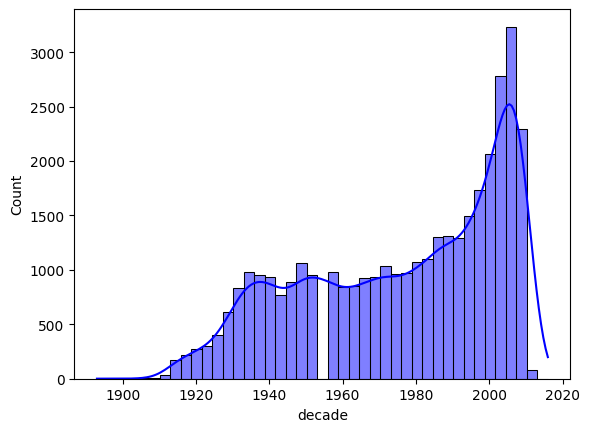

In [15]:

# plot the movie counts by period of 3 years
df_merge_test_1['decade'] = (df_merge_test_1['release_year'].astype(int) // 3) * 3
sns.histplot(df_merge_test_1['decade'], kde=True,  color='blue', label='treated')


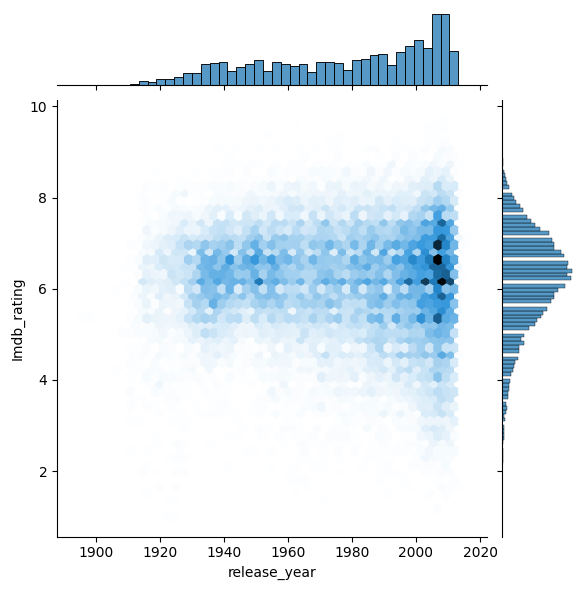

In [16]:
df_merge_test_1['release_year'] = df_merge_test_1['release_year'].astype('Int16')
sns.jointplot(data=df_merge_test_1, x='release_year', y='Imdb_rating', kind='hex')


## Genre analyse

In the folowing we will analyse the genre of the movies.looking which are the most common and which are the most rated.

In [17]:
# To get the list of all genres in the 'genres' column
all_genres = set()
for genres in df_merge_test_1['genres']:
   for genre in genres:
    if genre not in all_genres:
      all_genres.add(genre)
print("Number of genres: {}".format(len(all_genres)))

Number of genres: 348


Text(0.5, 1.0, 'Number of movies by number of genres')

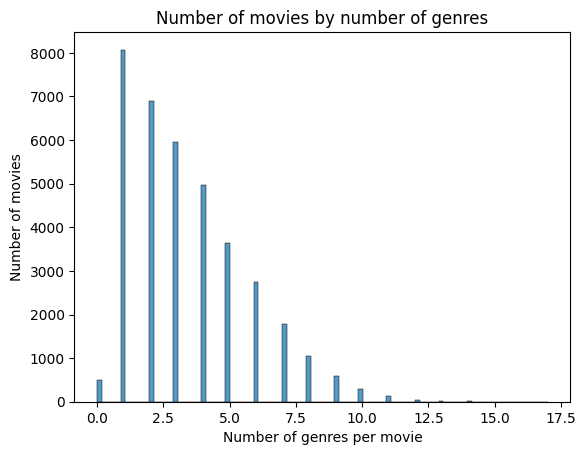

In [18]:

#Afficher le nb de film par genre 
merged_df_2 = df_merge_test_1.reset_index(drop=True).copy()
merged_df_2['nb_genres'] = merged_df_2['genres'].apply(lambda x: len(x))
sns.histplot(data=merged_df_2, x='nb_genres')
plt.xlabel('Number of genres per movie')
plt.ylabel('Number of movies')
plt.title('Number of movies by number of genres')


#print(merged_df_2['nb_genres'])

In [19]:
#the following 
merged_df_2[['runtime',	'release_year',	'Imdb_rating',	'numVotes','nb_genres']].describe()

,runtime,release_year,Imdb_rating,numVotes,nb_genres
count,30780.000000,36675.0,36675.000000,3.667500e+04,36675.000000
mean,99.826559,1977.503149,6.154953,1.702311e+04,3.425222
std,42.239928,26.986912,1.109908,8.350678e+04,2.255589
min,3.000000,1894.0,1.000000,5.000000e+00,0.000000
25%,85.000000,1955.0,5.500000,1.160000e+02,2.000000
50%,95.000000,1984.0,6.300000,6.290000e+02,3.000000
75%,109.000000,2002.0,6.900000,3.591500e+03,5.000000
max,5220.000000,2016.0,9.700000,2.815662e+06,17.000000


Text(0.5, 1.0, 'Number of movies by genre')

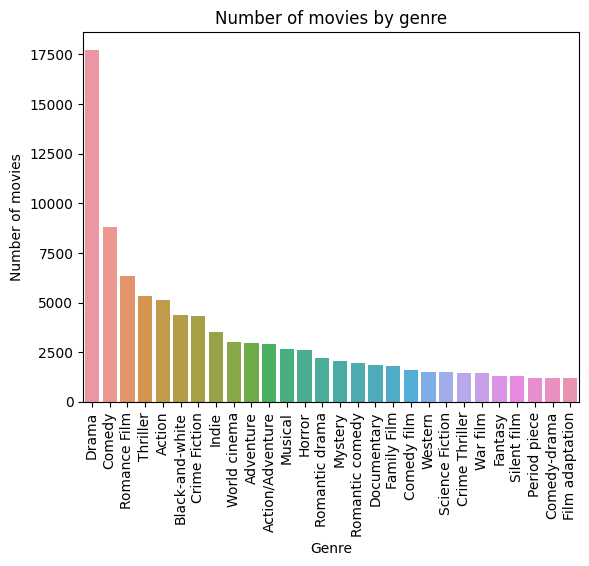

In [20]:
count_min = 1000
genre_count = pd.Series([genre for genres in merged_df_2['genres'] for genre in genres]).value_counts()
# plot the count of each genre
sns.barplot(x=genre_count[genre_count > count_min].index, y=genre_count[genre_count > count_min].values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Number of movies by genre')

In [21]:
merged_df_4 = merged_df_2.copy()
genre_big = genre_count[genre_count > count_min].index
merged_df_4 = merged_df_4[merged_df_4['genres'].apply(lambda x: all(genre in genre_big for genre in x))]
merged_df_4 = merged_df_4[['genres', 'Imdb_rating']]
merged_df_4 = merged_df_4.reset_index(drop=True)

lst_rating = []
for genre in genre_big:
  lst_rating.append(merged_df_4[merged_df_4['genres'].apply(lambda x: genre in x)]['Imdb_rating'].values)   

Text(0.5, 1.0, 'IMDb Rating by Genre')

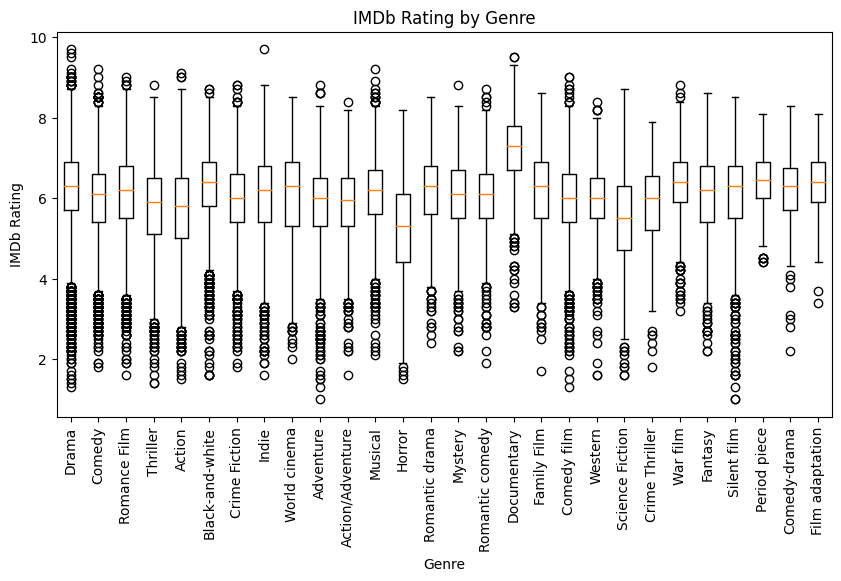

In [22]:
plt.figure(figsize=(10, 5))

plt.boxplot(lst_rating, labels=genre_big)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.title('IMDb Rating by Genre')